## Preprocess model data: 

In [782]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [783]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [784]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

In [785]:
import seaborn as sns
import matplotlib.pyplot as plt

In [786]:
import numpy as np

In [787]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [788]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [789]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [790]:
import datetime 

In [791]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some definitions

In [792]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [793]:
model_lev_i=-1
select_station = 'SMR'

In [794]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [795]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [796]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## Read in model data. 

### ECHAM SALSA:

In [797]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [798]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [799]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [800]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bol

In [801]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-12-15 14:56:12,630 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [802]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### EC-Earth

In [803]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [804]:
case_name = 'ECE3_output_Sara'
case_name_ec_earth = 'ECE3_output_Sara'
from_time = '2012-01'
to_time = '2019-02'
time_res = 'hour'
space_res='locations'
model_name='EC-Earth'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [805]:
varl =[
    'CCN0.20',
    'CCN1.00',
    'M_SO4NUS',
    'M_SOANUS',
    'M_BCAIS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_SO4ACS',
    'M_BCACS',
    'M_POMACS',
    'M_SSACS',
    'M_DUACS',
    'M_SOAACS',
    'M_SO4COS',
    'M_BCCOS',
    'M_POMCOS',
    'M_SSCOS',
    'M_DUCOS',
    'M_SOACOS',
    'M_BCAII',
    'M_POMAII',
    'M_SOAAII',
    'M_DUACI',
    'M_DUCOI',
    'N_NUS',
    'N_AIS',
    'N_ACS',
    'N_COS',
    'N_AII',
    'N_ACI',
    'N_COI',
    'RWET_NUS',
    'RWET_AIS',
    'RWET_ACS',
    'RWET_COS',
    'RWET_AII',
    'RWET_ACI',
    'RWET_COI',
    'RDRY_NUS',
    'RDRY_AIS',
    'RDRY_ACS',
    'RDRY_COS',
    'od550aer',
    'od550oa',
    'od550soa',
    'od440aer',
    'od870aer',
    'od350aer',
    'loadsoa',
    'emiterp',
    'emiisop',
]
varl_ifs=[
    'var130',

] 

#### Read in EC-Earth:

In [806]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Outp

In [807]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

In [808]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
        

    ds_ifs = c.get_collocated_dataset(varl_ifs)


    ds = c.get_collocated_dataset(varl)
    ds = fix_timestamp_ec_earth(ds)
    ds_ifs = ds_ifs.rename({'lev':'lev_ifs'})
    

    ds = xr.merge([ds,ds_ifs])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2022-12-15 14:56:15,892 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
2022-12-15 14:56:15,892 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


2022-12-15 14:56:15,939 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_201

['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc']
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/use

In [809]:
dic_mod_ca['EC-Earth'] = dic_ds.copy()

In [810]:
dic_mod_ca['EC-Earth']['ECE3_output_Sara']

<xarray.Dataset>
Dimensions:    (station: 7, time: 61369, lev: 34, lev_ifs: 91)
Coordinates:
  * station    (station) object 'ATTO' 'BIR' 'HTM' 'SGP' 'SMR' 'SMR4' 'VHL'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
  * lev        (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 30.0 31.0 32.0 33.0 34.0
  * lev_ifs    (lev_ifs) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
Data variables: (12/52)
    CCN0.20    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    CCN1.00    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCACS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAII    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAIS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCCOS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    ...         ...
    od440aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550oa    (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550soa   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od870aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    var130     (station, time, lev_ifs) float32 nan nan nan ... 278.7 278.8

### NORESM

#### Settings:

In [811]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [812]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [813]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [814]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [815]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [816]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       #'hyam','hybm',
       #'hyai','hybi',
       
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [817]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC

In [818]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/

In [819]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-12-15 14:56:19,434 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [820]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-12-15 14:56:20,597 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [821]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [822]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [823]:
dic_ds = {case_mod: ds_comb}

In [824]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [825]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/40)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

## SELECT STATION:


In [826]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
EC-Earth
NorESM


## Select level: 

In [827]:
for mod in dic_mod_ca.keys():
    if mod=='EC-Earth':
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
NorESM


TM5 has model levels going from the ground and up, IFS from the top and down. 

In [828]:
mod = 'EC-Earth'
for ca in dic_mod_ca[mod].keys():
    # Because model_lev in in neg from above, need to subtract 1 so -1 
    # is equivalent to 0.
    lev_i_tm5 = -model_lev_i-1
    dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
    dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev_ifs=model_lev_i)
    dic_mod_ca[mod][ca].load()

## Adjust ECHAM

In [829]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [830]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [831]:
standard_air_density = 100*pressure/(R*temperature)

In [832]:
import datetime

### Fix echam time

In [833]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [834]:
ds_echam = dic_mod_ca['ECHAM-SALSA'][case_name_echam]
air_dens = ds_echam['apm']/(R*ds_echam['tempair'])

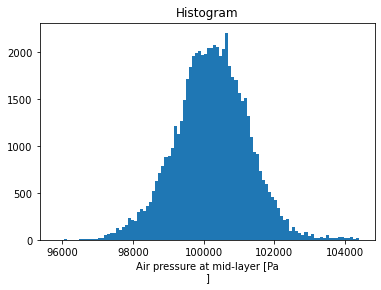

In [835]:
ds_echam['apm'].plot.hist(bins=100);

### Run ds2df_echam

In [836]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=air_dens,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


,lon,lev,station,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,...,VBS0_gas_conc,VBS10_gas_conc,OAG,cwp,ceff_um,lcdnc_cm3,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,24.2896,47.0,SMR,1.361203e-11,1.195408e-11,8.112913e-12,6.094467e-13,7.643650e-12,1.722048e-12,1.059090e-10,...,6.015366e-06,0.002384,0.140407,256.340515,0.0,4.911462e-35,-5.690857,False,False,False
2012-01-01 01:00:00,24.2896,47.0,SMR,1.526825e-11,1.340976e-11,9.095198e-12,5.985267e-13,8.574262e-12,1.930941e-12,1.198592e-10,...,4.245719e-06,0.002270,0.158488,220.838120,0.0,8.720350e-35,-5.732605,False,False,False
2012-01-01 02:00:00,24.2896,47.0,SMR,2.012862e-11,1.768351e-11,1.196703e-11,5.865213e-13,1.130422e-11,2.542114e-12,1.652919e-10,...,2.978540e-06,0.002327,0.217703,192.647324,0.0,-6.989588e-36,-5.700928,False,False,False
2012-01-01 03:00:00,24.2896,47.0,SMR,2.654426e-11,2.332372e-11,1.576086e-11,5.750081e-13,1.490835e-11,3.349550e-12,2.306323e-10,...,1.731899e-06,0.002281,0.302628,166.926910,0.0,1.083489e-34,-5.572144,False,False,False
2012-01-01 04:00:00,24.2896,47.0,SMR,3.203289e-11,2.814790e-11,1.901204e-11,5.630599e-13,1.799283e-11,4.041667e-12,2.941777e-10,...,1.039634e-06,0.002142,0.384949,144.410721,0.0,7.350604e-35,-5.342072,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,24.2896,47.0,SMR,2.225506e-11,1.951626e-11,1.326462e-11,2.384533e-12,1.249081e-11,2.828762e-12,1.578346e-10,...,4.218587e-07,0.000637,0.202848,63.028210,0.0,2.940085e-35,-3.349548,False,False,False
2018-12-31 20:00:00,24.2896,47.0,SMR,2.359773e-11,2.072263e-11,1.407822e-11,1.931136e-12,1.326150e-11,3.002594e-12,9.555966e-11,...,1.134995e-06,0.000499,0.122546,76.085457,0.0,7.577885e-35,-3.048615,False,False,False
2018-12-31 21:00:00,24.2896,47.0,SMR,2.526455e-11,2.221320e-11,1.507039e-11,1.576099e-12,1.421139e-11,3.217937e-12,6.283594e-11,...,1.183158e-06,0.000341,0.080366,44.751438,0.0,7.247229e-35,-2.815002,False,False,False


<AxesSubplot:xlabel='time'>

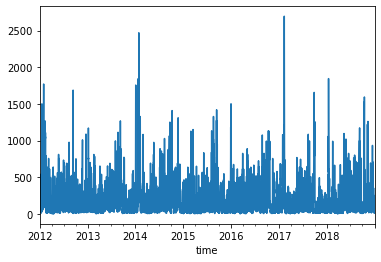

In [837]:
df['N100'].plot()

### Save result

In [838]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### Adjust EC-Earth:

In [839]:
ds_ec_earth = dic_mod_ca['EC-Earth'][case_name_ec_earth]


## Check all data there: 

In [840]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import rad_vars, num_vars

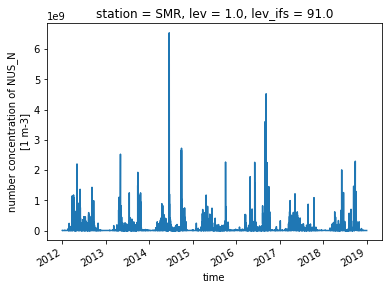

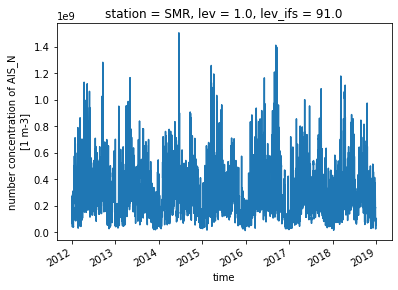

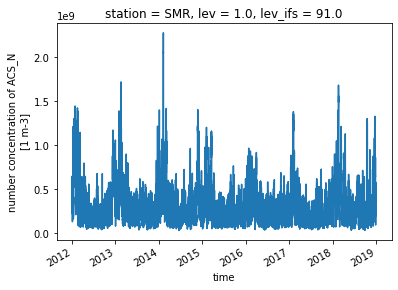

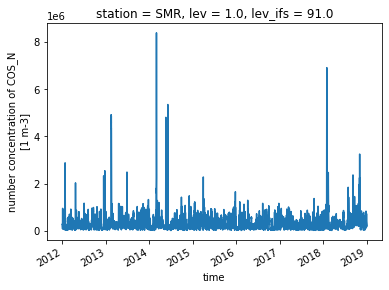

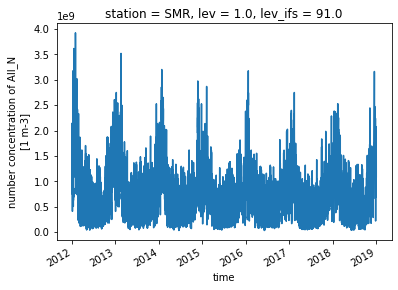

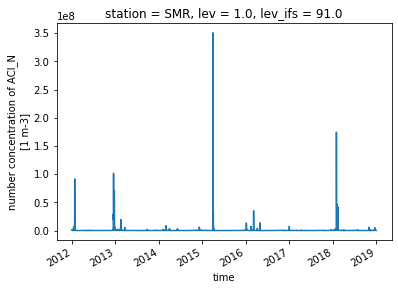

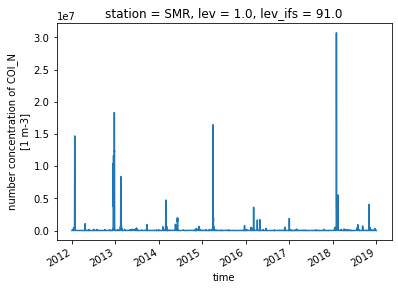

In [843]:
for n in num_vars:
    ds_ec_earth[n].plot()
    plt.show()

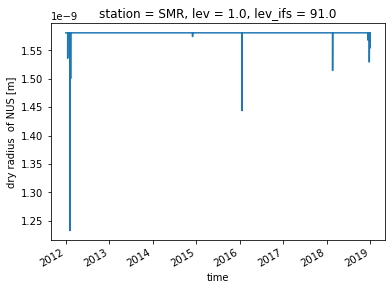

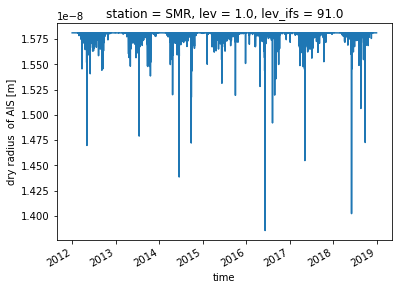

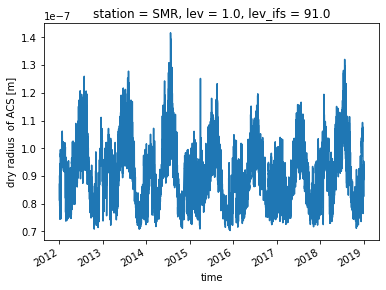

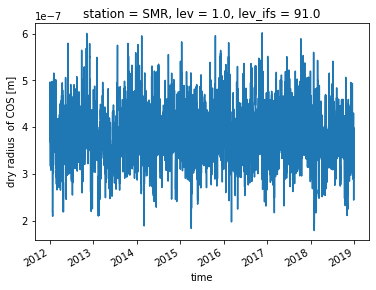

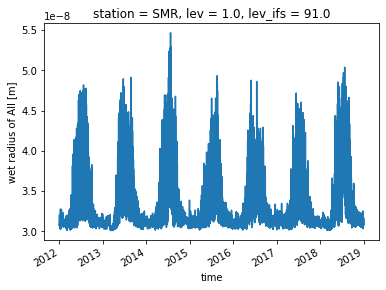

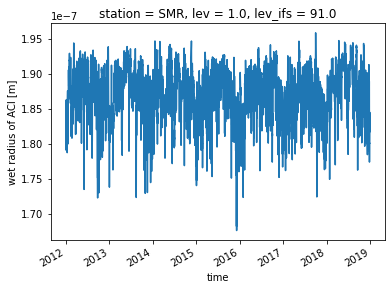

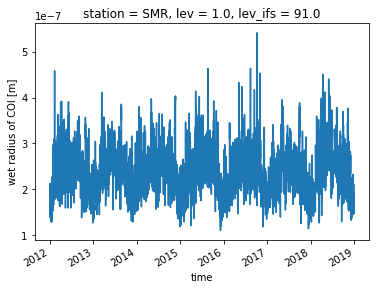

In [844]:
for n in rad_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [845]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import ds2df_ec_earth

In [846]:
ds_ec_earth

<xarray.Dataset>
Dimensions:    (time: 61369)
Coordinates:
    station    <U3 'SMR'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
    lev        float64 1.0
    lev_ifs    float64 91.0
Data variables: (12/52)
    CCN0.20    (time) float32 210.3 238.5 264.2 289.3 ... 315.2 314.6 314.5 nan
    CCN1.00    (time) float32 328.7 370.8 408.8 443.4 ... 389.8 389.0 389.1 nan
    M_BCACS    (time) float32 1.313e-10 1.48e-10 1.637e-10 ... 1.631e-10 nan
    M_BCAII    (time) float32 1.761e-10 2.002e-10 2.225e-10 ... 1.906e-10 nan
    M_BCAIS    (time) float32 6.469e-13 5.436e-13 5.254e-13 ... 1.823e-12 nan
    M_BCCOS    (time) float32 5.554e-16 6.122e-16 6.355e-16 ... 6.342e-16 nan
    ...         ...
    od440aer   (time) float32 0.05294 0.05509 0.05488 ... 0.03982 0.04009 nan
    od550aer   (time) float32 0.0413 0.04252 0.04231 ... 0.03044 0.0306 nan
    od550oa    (time) float32 0.009162 0.009512 0.009606 ... 0.009313 nan
    od550soa   (time) float32 0.004216 0.004157 0.004048 ... 0.001845 nan
    od870aer   (time) float32 0.02235 0.02332 0.02323 ... 0.01537 0.01526 nan
    var130     (time) float32 nan nan nan 258.8 nan ... nan 270.9 nan nan 272.4

In [847]:

df, df_sm = ds2df_ec_earth(ds_ec_earth, 
                        take_daily_median=False, 
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting N_NUS from m-3 to cm-3
Converting N_AIS from m-3 to cm-3
Converting N_ACS from m-3 to cm-3
Converting N_COS from m-3 to cm-3
Converting N_AII from m-3 to cm-3
Converting N_ACI from m-3 to cm-3
Converting N_COI from m-3 to cm-3
Converting RDRY_NUS from m to nm
Converting RDRY_AIS from m to nm
Converting RDRY_ACS from m to nm
Converting RDRY_COS from m to nm
Converting RWET_AII from m to nm
Converting RWET_ACI from m to nm
Converting RWET_COI from m to nm
Converting M_SOANUS from kg/m3 to um/m3
Converting M_POMAIS from kg/m3 to um/m3
Converting M_SOAAIS from kg/m3 to um/m3
Converting M_POMACS from kg/m3 to um/m3
Converting M_SOAACS from kg/m3 to um/m3
Converting M_POMCOS from kg/m3 to um/m3
Converting M_SOACOS from kg/m3 to um/m3
Converting M_POMAII from kg/m3 to um/m3
Converting M_SOAAII from kg/m3 to um/m3
renaming var130 to temp


,station,time_orig,lev,CCN0.20,CCN1.00,M_BCACS,M_BCAII,M_BCAIS,M_BCCOS,M_DUACI,...,N150-500,N200-500,OA,POM,SOA,SOA2,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,SMR,2012-01-01 00:30:00,1.0,210.349487,328.704193,1.312838e-10,1.760822e-10,6.468536e-13,5.554017e-16,2.331612e-10,...,196.935490,101.754681,1.813057,1.737373,0.075684,0.075684,NaN,False,False,False
2012-01-01 01:00:00,SMR,2012-01-01 01:30:00,1.0,238.479065,370.828125,1.479828e-10,2.002312e-10,5.436276e-13,6.121765e-16,2.344173e-10,...,224.057987,116.241666,2.074929,1.999963,0.074966,0.074966,NaN,False,False,False
2012-01-01 02:00:00,SMR,2012-01-01 02:30:00,1.0,264.209625,408.752502,1.637148e-10,2.224790e-10,5.254167e-13,6.354531e-16,2.355444e-10,...,249.143457,129.551621,2.320950,2.244422,0.076527,0.076527,NaN,False,False,False
2012-01-01 03:00:00,SMR,2012-01-01 03:30:00,1.0,289.251404,443.429291,1.786072e-10,2.429668e-10,5.675244e-13,6.503565e-16,2.366023e-10,...,273.240513,142.554836,2.553694,2.472160,0.081534,0.081534,-14.315735,False,False,False
2012-01-01 04:00:00,SMR,2012-01-01 04:30:00,1.0,313.352417,475.294556,1.927297e-10,2.617789e-10,6.486790e-13,6.622721e-16,2.375622e-10,...,296.305901,155.159277,2.774989,2.684082,0.090908,0.090908,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,SMR,2018-12-31 20:30:00,1.0,318.413849,394.142242,1.709785e-10,2.026840e-10,1.881653e-12,8.132766e-16,8.079349e-12,...,282.389702,166.922512,2.239892,2.182843,0.057050,0.057050,NaN,False,False,False
2018-12-31 21:00:00,SMR,2018-12-31 21:30:00,1.0,315.230042,389.781250,1.666865e-10,1.965827e-10,1.886738e-12,7.316220e-16,7.938763e-12,...,278.282500,164.681933,2.203162,2.145369,0.057793,0.057793,-2.202515,False,False,False
2018-12-31 22:00:00,SMR,2018-12-31 22:30:00,1.0,314.643311,388.998383,1.645214e-10,1.931307e-10,1.865770e-12,6.738140e-16,7.820041e-12,...,276.964682,163.941755,2.192743,2.133609,0.059134,0.059134,NaN,False,False,False


<AxesSubplot:xlabel='time'>

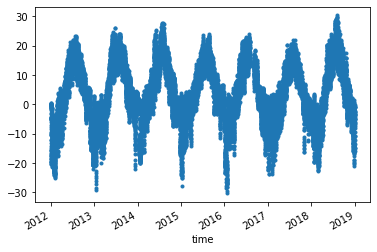

In [848]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

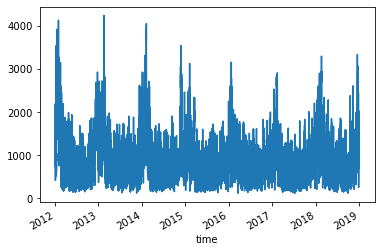

In [851]:
df['N50'].plot()#.columns#['Temperature'].plot()

### Save result

In [706]:


_di = {case_name_ec_earth:df}
_dism = {case_name_ec_earth:df_sm}

dic_df_mod_case['EC-Earth']= _di.copy()
dic_dfsm_mod_case['EC-Earth'] = _dism.copy()

## Adjust NorESM

In [707]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

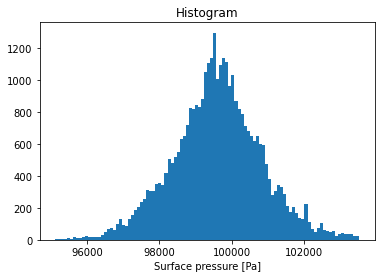

In [708]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

In [709]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

### Run ds2df NorESM

In [710]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=air_dens,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()
#dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR


<AxesSubplot:xlabel='time'>

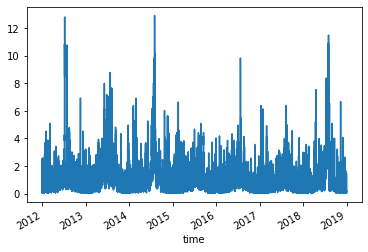

In [711]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

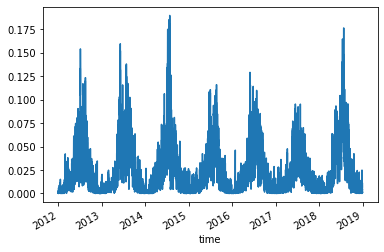

In [712]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['SOA_NA'].plot()

## SHIFT TIME to local time: Easter european winter time EET UTC+2

In [713]:
import datetime

In [714]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=2)

In [715]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 03:00:00',
               '2012-01-02 04:00:00', '2012-01-02 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Write to file:

In [716]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv


<AxesSubplot:xlabel='time'>

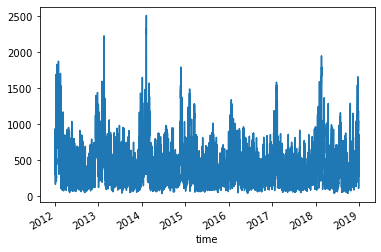

In [717]:
dic_df_mod_case[mod][ca]['N100'].plot()